# Lab 2: Advanced Image Processing and Manipulation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Load and Display an Image

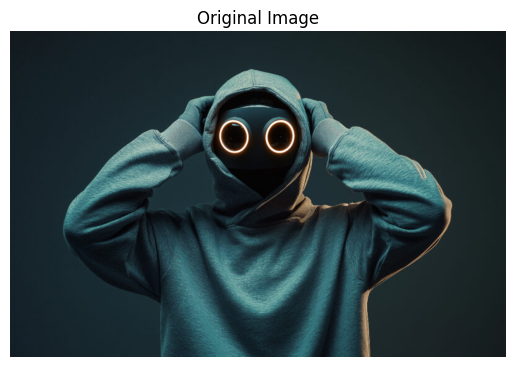

Image Dimensions: (525, 800, 3) (Height, Width, Channels)


In [2]:
# Load image
image_path = 'image.jpg'  # Change this to the path of your image
image = cv2.imread(image_path)

# Convert image from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image using Matplotlib
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Print image dimensions
print(f'Image Dimensions: {image.shape} (Height, Width, Channels)')

## Task 2: Explore Color Representations

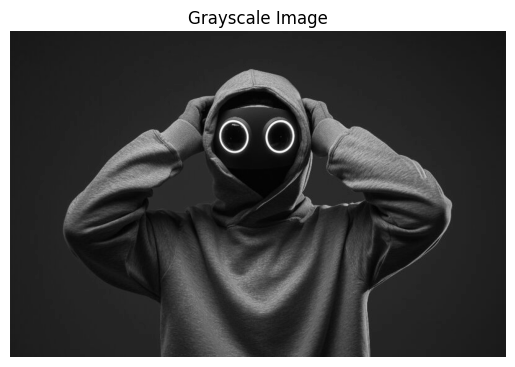

In [3]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

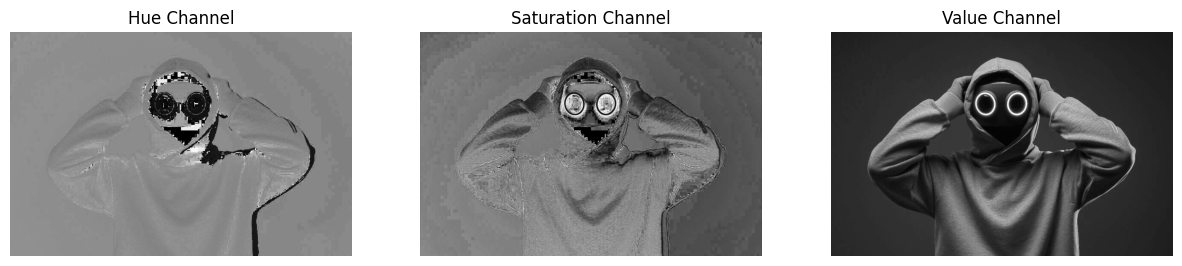

In [4]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split channels
h, s, v = cv2.split(hsv)

# Display each channel
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(h, cmap='gray')
ax[0].set_title("Hue Channel")
ax[1].imshow(s, cmap='gray')
ax[1].set_title("Saturation Channel")
ax[2].imshow(v, cmap='gray')
ax[2].set_title("Value Channel")

for a in ax:
    a.axis('off')

plt.show()

## Task 3: Geometric Transformations

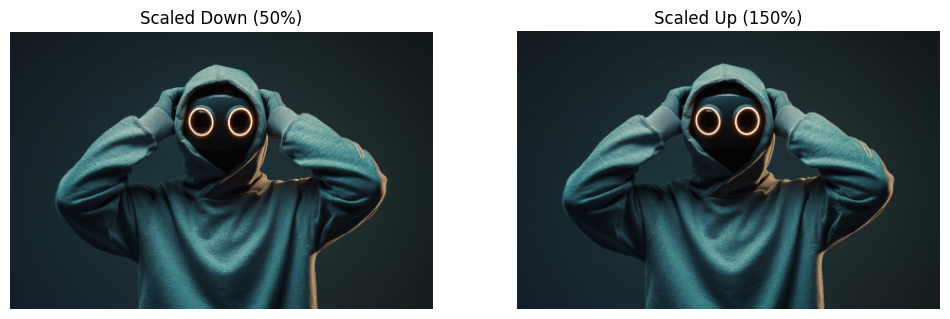

In [5]:
# Resize image (scaling by 50% and 150%)
image_small = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
image_large = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Display images
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(image_small, cv2.COLOR_BGR2RGB))
ax[0].set_title("Scaled Down (50%)")
ax[1].imshow(cv2.cvtColor(image_large, cv2.COLOR_BGR2RGB))
ax[1].set_title("Scaled Up (150%)")

for a in ax:
    a.axis('off')

plt.show()

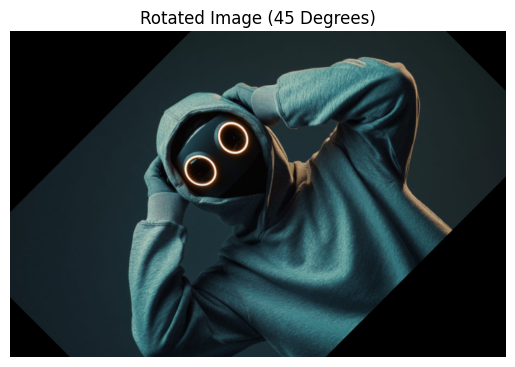

In [6]:
# Rotate image by 45 degrees
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, rotation_matrix, (w, h))

# Display rotated image
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image (45 Degrees)")
plt.axis('off')
plt.show()

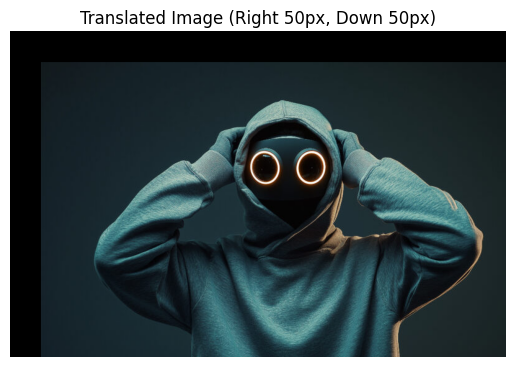

In [7]:
# Translate image (shift right by 50 pixels, down by 50 pixels)
translation_matrix = np.float32([[1, 0, 50], [0, 1, 50]])
translated = cv2.warpAffine(image, translation_matrix, (w, h))

# Display translated image
plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.title("Translated Image (Right 50px, Down 50px)")
plt.axis('off')
plt.show()

## Task 4: Mini-Pipeline Project

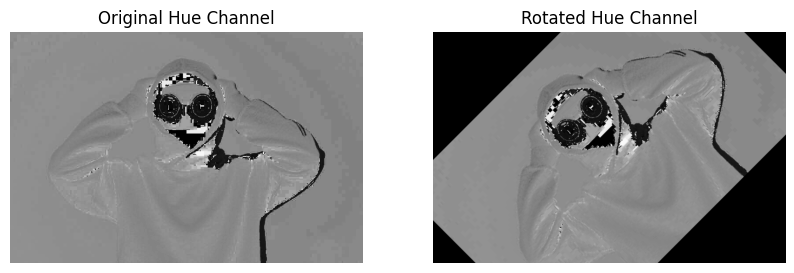

In [8]:
# Mini-Pipeline: Load -> Convert to HSV -> Extract Hue -> Rotate -> Display
hue_channel = cv2.split(hsv)[0]
rotated_hue = cv2.warpAffine(hue_channel, rotation_matrix, (w, h))

# Display
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(hue_channel, cmap='gray')
ax[0].set_title('Original Hue Channel')

ax[1].imshow(rotated_hue, cmap='gray')
ax[1].set_title('Rotated Hue Channel')

for a in ax:
    a.axis('off')

plt.show()

Image Dimensions: (525, 800, 3)


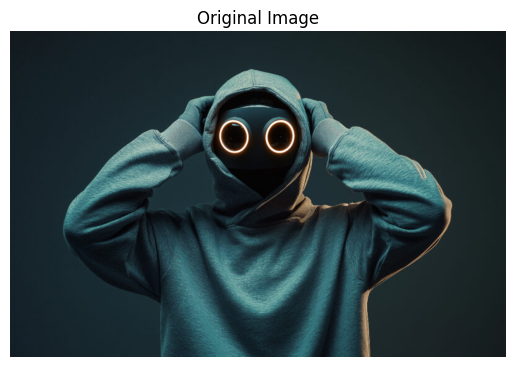

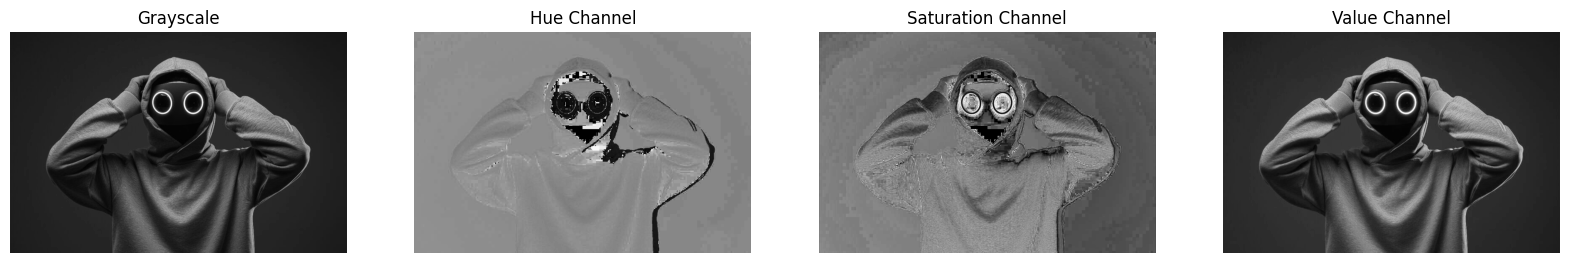

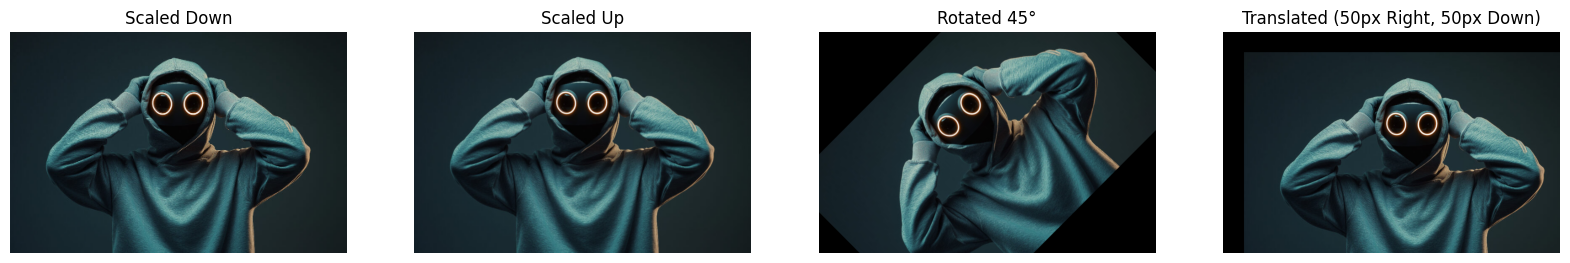

In [9]:
def mini_pipeline(image_path):
    # Load and display image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(f"Image Dimensions: {image.shape}")
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    
    # Explore color representations
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(grayscale, cmap='gray')
    axes[0].set_title("Grayscale")
    
    axes[1].imshow(h, cmap='gray')
    axes[1].set_title("Hue Channel")
    
    axes[2].imshow(s, cmap='gray')
    axes[2].set_title("Saturation Channel")
    
    axes[3].imshow(v, cmap='gray')
    axes[3].set_title("Value Channel")
    
    for ax in axes:
        ax.axis("off")
    
    plt.show()
    
    # Apply geometric transformations
    height, width = image.shape[:2]
    
    # Scaling
    scaled_down = cv2.resize(image, (width//2, height//2), interpolation=cv2.INTER_LINEAR)
    scaled_up = cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_LINEAR)
    
    # Rotation
    M_rotate = cv2.getRotationMatrix2D((width//2, height//2), 45, 1)
    rotated = cv2.warpAffine(image, M_rotate, (width, height))
    
    # Translation
    M_translate = np.float32([[1, 0, 50], [0, 1, 50]])
    translated = cv2.warpAffine(image, M_translate, (width, height))
    
    # Display transformations
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].imshow(cv2.cvtColor(scaled_down, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Scaled Down")
    
    axes[1].imshow(cv2.cvtColor(scaled_up, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Scaled Up")
    
    axes[2].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Rotated 45°")
    
    axes[3].imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
    axes[3].set_title("Translated (50px Right, 50px Down)")
    
    for ax in axes:
        ax.axis("off")
    
    plt.show()

mini_pipeline("image.jpg")

## Conclusion & Discussion

- In this lab, we explored different image processing techniques.
- Changing the color space helps in extracting useful details from images.
- We performed geometric transformations like resizing, rotating, and shifting images.
- The choice of interpolation method impacts the quality of transformed images.